# Helpful Resources
* Example Tutorial: https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
* Bokeh Visualization Documentation: https://docs.bokeh.org/en/latest/docs/user_guide/geo.html
* Bokeh Documentation for Jupyter: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html
* Bokeh Palettes Documentation: https://docs.bokeh.org/en/latest/docs/reference/palettes.html

In [45]:
# imports
import geopandas as gpd
import pandas as pd
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [46]:
# set pandas to display all columns in dataframe
pd.set_option("display.max_columns", None)

In [47]:
# read in combined dataset
combined_df = pd.read_csv("https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/combined_jun13.csv")

In [ ]:
combined_df.head()

# Plotting States With Bokeh

In [ ]:
# read in states shapefile from US Census Bureau
states_usa = gpd.read_file("bokeh/cb_2018_us_state_20m.shp")
print("States shapefile dimension: {}".format(states_usa.shape))
states_usa.head()

In [ ]:
# try to visualizae Maryland
states_usa.iloc[0]["geometry"]

In [ ]:
# merge combined dataset with state shapefile
merged_states = states_usa.merge(combined_df, left_on="NAME", right_on="STATE")
print("Merged States Dataframe Dimensions: {}".format(merged_states.shape))
merged_states.head()

In [ ]:
# drop Alaska and Hawaii
merged_states = merged_states.loc[~merged_states["NAME"].isin(["Alaska", "Hawaii"])]

In [ ]:
# input GeoJSON source that contains features for plotting
geosource_states = GeoJSONDataSource(geojson = merged_states.to_json())

In [ ]:
# plot states map

# create figure object.
plot = figure(title = 'Test Bokeh Map', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None

# add patch renderer to figure.
states = plot.patches('xs','ys', source = geosource_states,
                   fill_color = None,
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)
# create hover tool
plot.add_tools(HoverTool(renderers = [state],
                      tooltips = [('State','@NAME'),
                                ('Votes','@COUNTY_TOTALVOTES')]))

# generates a map on separate tab in browser
show(plot)

# Plotting Counties With Bokeh

In [48]:
# read in counties shapefile from US Census Bureau
counties_usa = gpd.read_file("bokeh/cb_2018_us_county_20m.shp")
print("Counties Shapefile Dimensions: {}".format(counties_usa.shape))
counties_usa.head()

Counties Shapefile Dimensions: (3220, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737499999999 35.202104, -80.29..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68698999999999 41.135956, -81.68..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373099999999 41.590034, -76.22..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15273999999999 32.660949, -95.15..."


In [49]:
# cast GEOID data type to float64 instead of str for merging
counties_usa["GEOID"] = counties_usa["GEOID"].astype("float64")

In [50]:
# merge counties shapefile with combined_df
merged_counties = counties_usa.merge(combined_df, left_on="GEOID", right_on="FIPS")
print("Merged Counties Dataframe Dimensions: {}".format(merged_counties.shape))
merged_counties.head()

Merged Counties Dataframe Dimensions: (15437, 76)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%
0,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79...",2161,2530,201237017,2012,37,17,North Carolina,Bladen County,37017.0,Mitt Romney,Barack Obama,7748.0,8062.0,15957.0,Barack Obama,democrat,0,0.0,NaN,12.7,32450.0,42,35,6703,5699,1123,1402,445,451,3.0,5,18294,16898,35192,10831,10502,8938,4544,4394,8078,3964,4114,10209,4904,5305,7967,3486,4481,0.001193,0.000995,0.190469,0.161940,0.031911,0.039839,0.012645,0.012815,0.000085,0.000142,0.307769,0.298420,0.519834,0.480166,0.253978,0.229541,0.290094,0.226387
1,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79...",4985,5356,201637017,2016,37,17,North Carolina,Bladen County,37017.0,Donald Trump,Hillary Clinton,8550.0,7058.0,15897.0,Donald Trump,republican,1,0.0,1.0,6.9,35168.0,56,53,6511,5480,1085,1383,493,468,6.0,6,17925,16461,34386,10572,10205,8163,4173,3990,7587,3715,3872,9502,4490,5012,9134,4083,5051,0.001629,0.001541,0.189350,0.159367,0.031554,0.040220,0.014337,0.013610,0.000174,0.000174,0.307451,0.296778,0.521288,0.478712,0.237393,0.220642,0.276333,0.265631
2,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79...",7835,11104,200037017,2000,37,17,North Carolina,Bladen County,37017.0,George W. Bush,Al Gore,4977.0,5889.0,10908.0,Al Gore,democrat,0,0.0,NaN,6.0,22852.0,20,18,6623,5659,430,764,356,316,9.0,8,16749,15503,32252,9643,9425,8777,4524,4253,8312,4119,4193,9014,4349,4665,6149,2511,3638,0.000620,0.000558,0.205352,0.175462,0.013333,0.023688,0.011038,0.009798,0.000279,0.000248,0.298989,0.292230,0.519317,0.480683,0.272138,0.257720,0.279487,0.190655
3,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79...",10904,14247,200437017,2004,37,17,North Carolina,Bladen County,37017.0,George W. Bush,John Kerry,6174.0,6109.0,12313.0,George W. Bush,republican,1,0.0,1.0,7.1,24844.0,24,19,6653,5644,719,922,403,381,9.0,6,17248,15881,33129,10009,9724,9193,4702,4491,8248,4010,4238,9363,4552,4811,6325,2617,3708,0.000724,0.000574,0.200821,0.170364,0.021703,0.027831,0.012165,0.011500,0.000272,0.000181,0.302122,0.293519,0.520631,0.479369,0.277491,0.248966,0.282622,0.190920
4,37,017,01026336,0500000US37017,37017.0,Bladen,06,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79...",13974,17390,200837017,2008,37,17,North Carolina,Bladen County,37017.0,John McCain,Barack Obama,7532.0,7853.0,15480.0,Barack Obama,democrat,0,0.0,0.0,7.7,28876.0,36,31,6760,5620,870,1181,415,398,3.0,6,17900,16385,34285,10472,10154,9197,4676,4521,7945,3825,4120,9999,4796,5203,7144,3088,4056,0.001050,0.000904,0.197171,0.163920,0.025376,0.034447,0.012104,0.011609,0.000088,0.000175,0.305440,0.296165,0.522094,0.477906,0.268251,0.231734,0.291644,0.208371


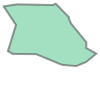

In [51]:
# try to visualize Bladen county
merged_counties.iloc[0]["geometry"]

In [52]:
# drop Alaska and Hawaii
merged_counties = merged_counties.loc[~merged_counties["STATE"].isin(["Alaska", "Hawaii"])]

In [ ]:
# input GeoJSON source that contains features for plotting
geosource_counties = GeoJSONDataSource(geojson = merged_counties.to_json())

In [ ]:
# plot county map

# create figure object
plot = figure(title = 'Test Bokeh Map', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, reset")
plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None

# add patch renderer to figure.
states = plot.patches('xs','ys', source = geosource_counties,
                   fill_color = None,
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)
# create hover tool
plot.add_tools(HoverTool(renderers = [county],
                      tooltips = [('County','@NAME'),
                                ('Votes','@COUNTY_TOTALVOTES')]))

# generates a map on separate tab in browser
show(plot)

# Plot Counties and County Votes With Color Slider Bar for Election Year 2000

In [53]:
# create 2000 election year data frame
yr2000 = merged_counties["YEAR"] == 2000
merged_2000 = merged_counties[yr2000]

# input GeoJSON source that contains features for plotting
geosource_2000 = GeoJSONDataSource(geojson = merged_2000.to_json())

In [54]:
# define color palettes
palette = brewer["GnBu"][8]

# use reverse order so higher values are darker
palette = palette[::-1]

In [ ]:
# find range for color bar by total # of votes cast by counties
# data_min = merged_2000["COUNTY_TOTALVOTES"].min()
# data_max = merged_2000["COUNTY_TOTALVOTES"].max()
# print("Min & Max of Total Votes: {} - {}".format(data_min, data_max))
merged_2000["COUNTY_TOTALVOTES"].describe()

In [55]:
# instantiate LineraColorMapper and manually set low/high end for colorbar
color_mapper = LinearColorMapper(palette = palette, low = 0, 
                                 high = 2.371175e+04)

In [56]:
# create color slider bar at the bottom of chart
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = "horizontal")

In [57]:
# create figure object
plot = figure(title = "Total # of Votes Cast by County in 2000 Presidential Election", 
           plot_height = 600, plot_width = 950, 
           toolbar_location = "below",
           tools = "pan, wheel_zoom, reset")

plot.xgrid.grid_line_color = None
plot.ygrid.grid_line_color = None

# add patch renderer to figure
counties = plot.patches("xs","ys", source = geosource_2000,
                   fill_color = {"field": "COUNTY_TOTALVOTES",
                                 "transform": color_mapper},
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)
# create hover tool
plot.add_tools(HoverTool(renderers = [counties],
                      tooltips = [("County","@NAME"),
                               ("Votes", "@COUNTY_TOTALVOTES")]))
# specify colorbar layout
plot.add_layout(color_bar, "below")

show(plot)

# TESTING CODE BELOW

In [ ]:
merged_2000["STATE"].unique()